In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
dc_major = data.field('DC_maj')
lgz = data.field('LGZ_size')

In [4]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [5]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm


In [6]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z)) ## 22 microns
Pw_g  = (power(Lum_dG,Flux_g,z)) 
Pw = power(Lum_d,flux_tot,z) ##151 MHz


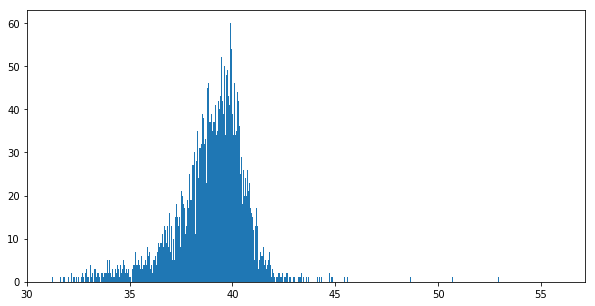

In [584]:
plt.figure(figsize=(10,5))
plt.hist(np.log10(Pw_g_H), bins = 1000)
#plt.xscale('log')
#plt.xlim(0,1e46)
fig = plt.gcf()

In [585]:
B = (np.log10(4810*Pw_g_H)*0.91)+4.89

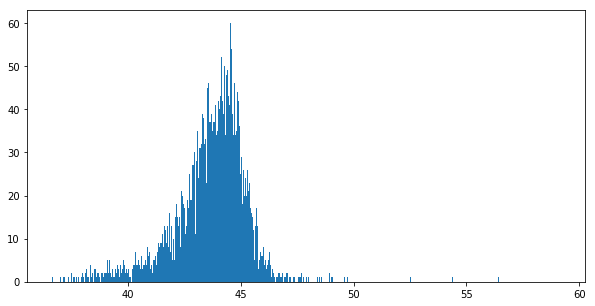

In [594]:
plt.figure(figsize=(10,5))
plt.hist(B, bins = 1000)
#plt.xscale('log')
#plt.xlim(0,1e46)
fig = plt.gcf()

In [591]:
A = np.log10(Pw_g_H)-np.log10(Pw_adj)

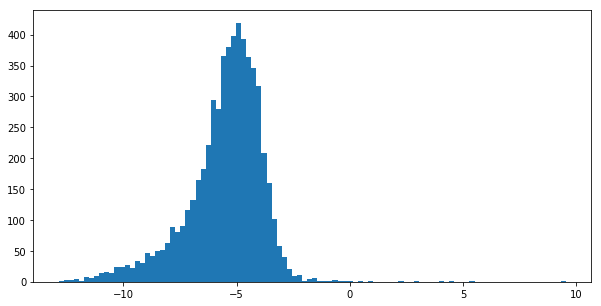

In [592]:
plt.figure(figsize=(10,5))
plt.hist(A, bins = 100)
#plt.xscale('log')
#plt.xlim(0,1e46)
fig = plt.gcf()

In [7]:
adj = np.where(Pw22>=4e43)
#adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz
Pw_g_H = array((Pw_g[adj])) # Optical luminosity >> This is the one to use to distinguish H & L

In [8]:
## Convert erg to J >>> WHz^-1
L_low_f = Pw_adj1*1e-7
L_mid_IR = Pw_adj*1e-7
L_opti = Pw_g_H*1e-7

z_new  = z[:5776,]


# Result of Crossmatch

In [9]:
hdul2 = fits.open('crossmatch1.fits')
data = hdul2[1].data
flux = data.field('Total_flux') # Obtain the total flux column 
redshift = data.field('z_best') # Obtain redshift column
flux_22 = data.field('w4Flux') # Obtain 22 microns flux
flux_g = data.field('gFApflux') # Obtain flux for g band

In [10]:
Q_d = array(cosmo.luminosity_distance([flux_g])*3.08567758e24) 
pw_g  = (power(Q_d,flux_g,redshift))
#Quasar_opti_P = Pw_g*1e-7


Lum_D = array(cosmo.luminosity_distance([flux])*3.08567758e24) 
pw = (power(Lum_D,flux,redshift))
#(1+redshift)**(-0.7)

Lum_D22 = array(cosmo.luminosity_distance([flux_22])*3.08567758e24)
pw22 = (power(Lum_D22,flux_22,redshift))

Adj = np.where(pw22>=4e43)

# FIND DATA FOR QUASARS

Quasar_mid_IR = array((pw22[Adj])*1e-7)
Quasar_Low_P = array((pw[Adj])*1e-7) 
Quasar_opti_P = array((pw_g[Adj])*1e-7)

z_QSO = redshift[:432,]


In [11]:
# FIND DATA FOR RADIO GALAXIES


RG_low = (set(L_low_f)-set(Quasar_Low_P))
P_RG_low  = array(list(RG_low))

RG_IR = (set(L_mid_IR)-set(Quasar_mid_IR))
P_RG_IR  = array(list(RG_IR))

RG_opti = (set(L_opti)-set(Quasar_opti_P))
P_RG_opti  = array(list(RG_opti))


z_RG = z[:5344,]

# Linear Size Classification

In [12]:
# Import desired parameters >>> DC_maj and LGZ size

dc_maj = data.field('DC_maj')
DC_maj = array(dc_maj)
A = data.field('LGZ_size')
LGZ = np.nan_to_num(A)
DC_MAJ = (np.nan_to_num(DC_maj))


# Calculate angular distance using python function

ad_QSO = array(cosmo.angular_diameter_distance(z_QSO)) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(z_RG))


In [13]:
dc_rg = (set(dc_major)-set(DC_maj))
DC_RG1  = array(list(dc_rg))

lgz_rg = (set(lgz)-set(A))
LGZ_RG1  = array(list(lgz_rg))

DC_RG = (np.nan_to_num(DC_RG1))*2  ### Deconvolved size for radio galaxies

LGZ_RG  = np.nan_to_num(LGZ_RG1)    ### LGZ for radio galaxies

In [14]:
## Loop that chooses LGZ instead of DC_maj for Quasars
for i in np.arange(len(DC_MAJ)):
    if (LGZ[i]==0):
        print (DC_MAJ)
    else:
        DC_MAJ[i] = LGZ[i]

[0.         0.         0.         ... 0.         9.71847447 5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ...  0.          9.718

In [15]:
for i in np.arange(len(DC_RG)):
    if (LGZ_RG[i]==0):
        print (DC_RG)
    else:
        DC_RG[i] = LGZ_RG[i]

[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643

In [16]:
def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size

In [17]:
a = DC_MAJ[DC_MAJ != 0]
a1 = a[:432,]
b = DC_RG[DC_RG != 0]
b1 =b[:5344,]

L_QSO = array(LZ(ad_QSO,a1))
L_RG = array(LZ(ad_RG,b1))

# Linear Size classification

In [18]:
def Binselect(p,q,r):
    Select = p[(p >= q) & (p <= r)]
    return array(Select)
#Binselect(Total_P,1e23,1e26).shape

def Square(x,z,mn,mx):
    select = x[(z >= mn) & (z <= mx)]
    return array(select[:,2])


In [19]:
P_qso1 =  Binselect(Quasar_Low_P,1e23,1e26)
Z_qso1 = z_QSO[:254,]
a = L_QSO[L_QSO != 0]
L_qso1 = a[:254,]
Bin1_qso = np.vstack((P_qso1,Z_qso1,L_qso1)).T
bin1_qso = Bin1_qso[Bin1_qso[:,2].argsort()]


P_rg1 = Binselect(P_RG_low,1e23,1e26)
Z_rg1= z_RG[:2488,]
b = L_RG[L_RG != 0]
L_rg1 = b[:2488,]
Bin1_rg = np.vstack((P_rg1,Z_rg1,L_rg1)).T
bin1_rg = Bin1_rg[Bin1_rg[:,2].argsort()]

P_qso2 =  Binselect(Quasar_Low_P,1e26,1e28)
Z_qso2 = z_QSO[:106,]
L_qso2 = a[:106,]
Bin2_qso = np.vstack((P_qso2,Z_qso2,L_qso2)).T
bin2_qso = Bin2_qso[Bin2_qso[:,2].argsort()]

P_rg2 = Binselect(P_RG_low,1e26,1e28)
Z_rg2 = z_RG[:2313,]
L_rg2 = b[:2313,]
Bin2_rg = np.vstack((P_rg2,Z_rg2,L_rg2)).T
bin2_rg = Bin2_rg[Bin2_rg[:,2].argsort()]


P_qso3 =  Binselect(Quasar_Low_P,1e28,1e30)
Z_qso3= z_QSO[:31,]
L_qso3 = a[:31,]
Bin3_qso = np.vstack((P_qso3,Z_qso3,L_qso3)).T
bin3_qso = Bin3_qso[Bin3_qso[:,2].argsort()]

P_rg3 = Binselect(P_RG_low,1e28,1e30)
Z_rg3 = z_RG[:442,]
L_rg3 = b[:442,]
Bin3_rg = np.vstack((P_rg3,Z_rg3,L_rg3)).T
bin3_rg = Bin3_rg[Bin3_rg[:,2].argsort()]

In [20]:
Square(bin3_rg,Z_rg3,1.75,2.00).shape

(9,)

# Linear Size Ratio

In [21]:
import statistics 

def Median(x,z,mn,mx):
    value = x[(z >= mn) & (z <= mx)]
    return statistics.median(value[:,2])
def median(x,z,mn,mx,n):
    v = x[(z >= mn) & (z <= mx)]
    return statistics.median(v[:,n])

def Selection(x,z,mn,mx):
    Value = x[(z >= mn) & (z <= mx)]
    return array(Value[:,0])

In [22]:
p1 = Binselect(L_low_f,1e23,1e26)
z1 = z_new[:2742,]
pz1 = np.vstack((p1,z1)).T

p2 = Binselect(L_low_f,1e26,1e28)
z2 = z_new[:2419,]
pz2 = np.vstack((p2,z2)).T

p3 = Binselect(L_low_f,1e28,1e30)
z3 = z_new[:473,]
pz3 = np.vstack((p3,z3)).T

In [26]:
print(Median(bin1_rg,Z_rg1,0.25,0.50)/Median(bin1_qso,Z_qso1,0.25,0.50),
     Median(bin1_rg,Z_rg1,0.50,0.75)/Median(bin1_qso,Z_qso1,0.50,0.75),
     Median(bin1_rg,Z_rg1,0.75,1.00)/Median(bin1_qso,Z_qso1,0.75,1.00),
     Median(bin1_rg,Z_rg1,1.00,1.25)/Median(bin1_qso,Z_qso1,1.00,1.25),
     Median(bin1_rg,Z_rg1,1.25,1.50)/Median(bin1_qso,Z_qso1,1.25,1.50),
     Median(bin1_rg,Z_rg1,1.5,1.75)/Median(bin1_qso,Z_qso1,1.5,1.75))

1.2643996183128665 1.2211937316026538 1.3508052467909837 1.4485657626105115 1.2416029490476248 1.4163146316805368


Text(0.5,0.98,'1e24 < Power < 1e26')

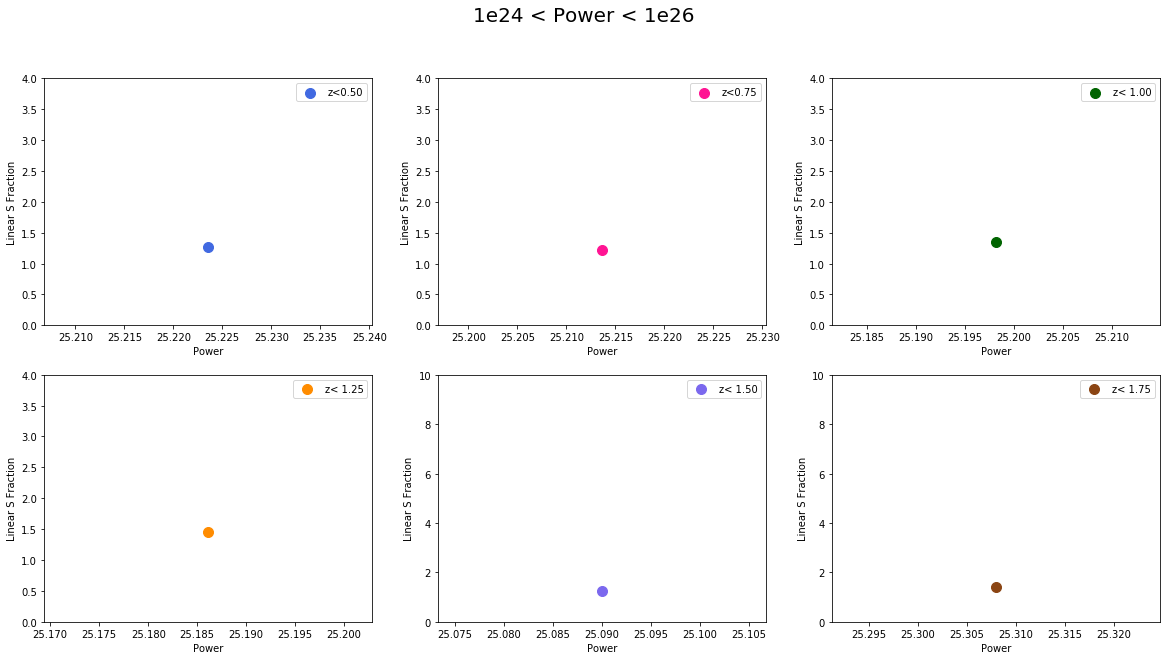

In [34]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.scatter(np.log10(1.673305612552026e+25),1.2643996183128665, c='royalblue',s = 100,label='z<0.50')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,4)

ax2.scatter(np.log10(1.6355087347535477e+25),1.2211937316026538, c='deeppink',s = 100, label='z<0.75')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.set_ylim(0,4)
ax2.legend()

ax3.scatter(np.log10(1.578221605744241e+25),1.3508052467909837, c='darkgreen',s=100,label='z< 1.00')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,4)
ax3.legend()

ax4.scatter(np.log10(1.5351084562736022e+25),1.4485657626105115, s = 100, c = 'darkorange', label = 'z< 1.25')
ax4.set_ylim(0,4)
ax4.set_xlabel('Power')
ax4.set_ylabel('Linear S Fraction')
ax4.legend(loc=1)

ax5.scatter(np.log10(1.2303887393650335e+25),1.2416029490476248, s = 100,c='mediumslateblue',label='z< 1.50')
ax5.set_xlabel('Power')
ax5.set_ylabel('Linear S Fraction')
ax5.set_ylim(0,10)
ax5.legend(loc=1)

ax6.scatter(np.log10(2.032265728777818e+25),1.4163146316805368,s =100, c='saddlebrown',label='z< 1.75')
ax6.set_xlabel('Power')
ax6.set_ylabel('Linear S Fraction')
ax6.set_ylim(0,10)
ax6.legend()

plt.suptitle('1e24 < Power < 1e26', fontsize=20)

In [27]:
print(Median(bin1_rg,Z_rg1,1.75,2.00)/Median(bin1_qso,Z_qso1,1.75,2.00),
     Median(bin2_rg,Z_rg2,1.75,2.00)/Median(bin2_qso,Z_qso2,1.75,2.00),
     Median(bin3_rg,Z_rg3,1.75,2.00)/Median(bin3_qso,Z_qso3,1.75,2.00),
     Median(bin3_rg,Z_rg3,1.00,1.25)/Median(bin3_qso,Z_qso3,1.00,1.25),
     Median(bin3_rg,Z_rg3,1.25,1.50)/Median(bin3_qso,Z_qso3,1.25,1.50),
     Median(bin3_rg,Z_rg3,1.5,1.75)/Median(bin3_qso,Z_qso3,1.5,1.75))

1.3490071535340344 1.2369148740894655 1.0458164180587322 4.735191401325649 0.9967549049440957 0.9538380502146946


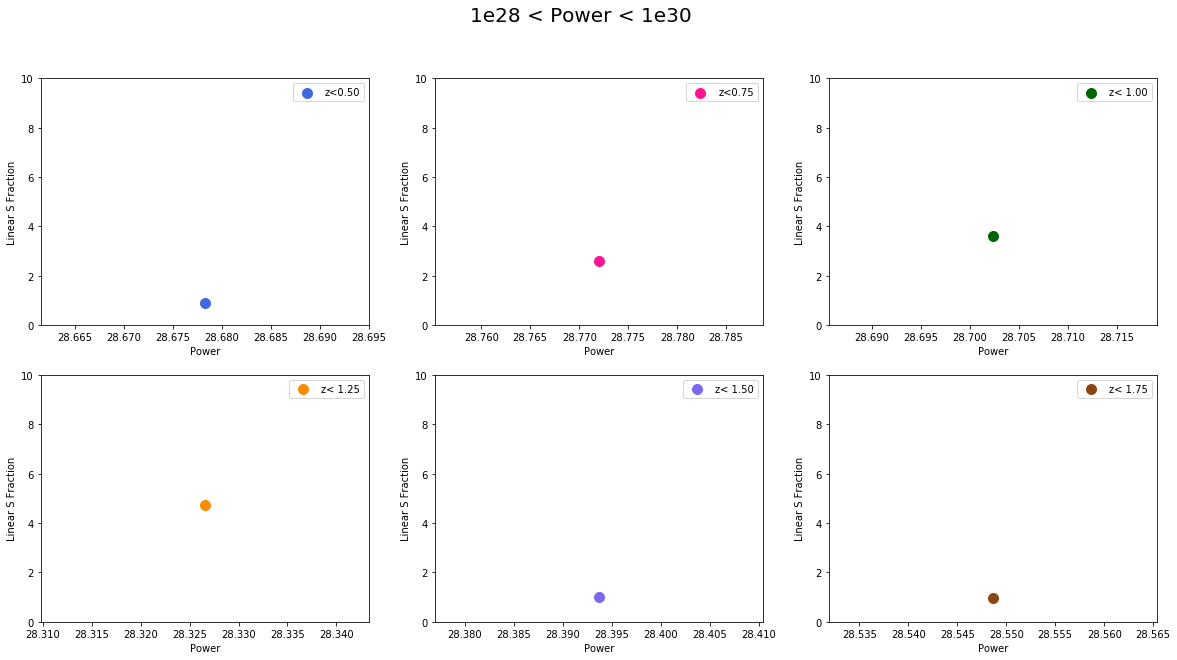

In [36]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.scatter(np.log10(4.767527442434798e+28),0.9197090832972978, c='royalblue',s = 100,label='z<0.50')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(5.915639800428714e+28), 2.6144834046834444 , c='deeppink',s = 100,label='z<0.75')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.legend()
ax2.set_ylim(0,10)

ax3.scatter(np.log10(5.039115193657703e+28),3.62012731512251, c='darkgreen',s = 100,label='z< 1.00')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()


ax4.scatter(np.log10(2.121152919415858e+28),4.735191401325649, c = 'darkorange',s = 100, label = 'z< 1.25')
ax4.set_ylim(0,10)
ax4.set_xlabel('Power')
ax4.set_ylabel('Linear S Fraction')
ax4.legend(loc=1)

ax5.scatter(np.log10(2.475692507581263e+28),0.9967549049440957, c='mediumslateblue',s = 100,label='z< 1.50')
ax5.set_xlabel('Power')
ax5.set_ylabel('Linear S Fraction')
ax5.set_ylim(0,10)
ax5.legend(loc=1)

ax6.scatter(np.log10(3.536845318848249e+28),0.9538380502146946, c='saddlebrown',s = 100,label='z< 1.75')
ax6.set_xlabel('Power')
ax6.set_ylabel('Linear S Fraction')
ax6.set_ylim(0,10)
ax6.legend()

plt.suptitle('1e28 < Power < 1e30', fontsize=20)
plt.show()

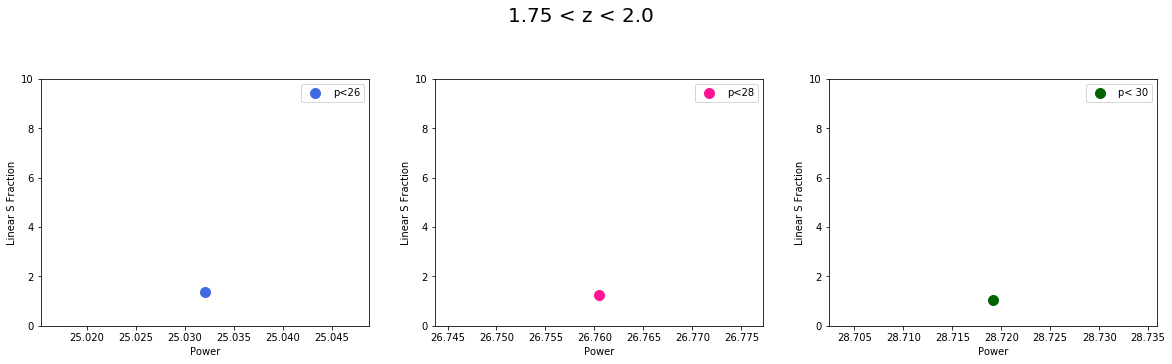

In [37]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)


ax1.scatter(np.log10(1.076633237284778e+25),1.3490071535340344, c='royalblue',s = 100,label='p<26')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(5.760341242734956e+26),1.2369148740894655, c='deeppink',s = 100,label='p<28')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.legend()
ax2.set_ylim(0,10)

ax3.scatter(np.log10(5.237573279238907e+28),1.0458164180587322, c='darkgreen',s = 100,label='p< 30')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()




plt.suptitle('1.75 < z < 2.0', fontsize=20)
plt.show()

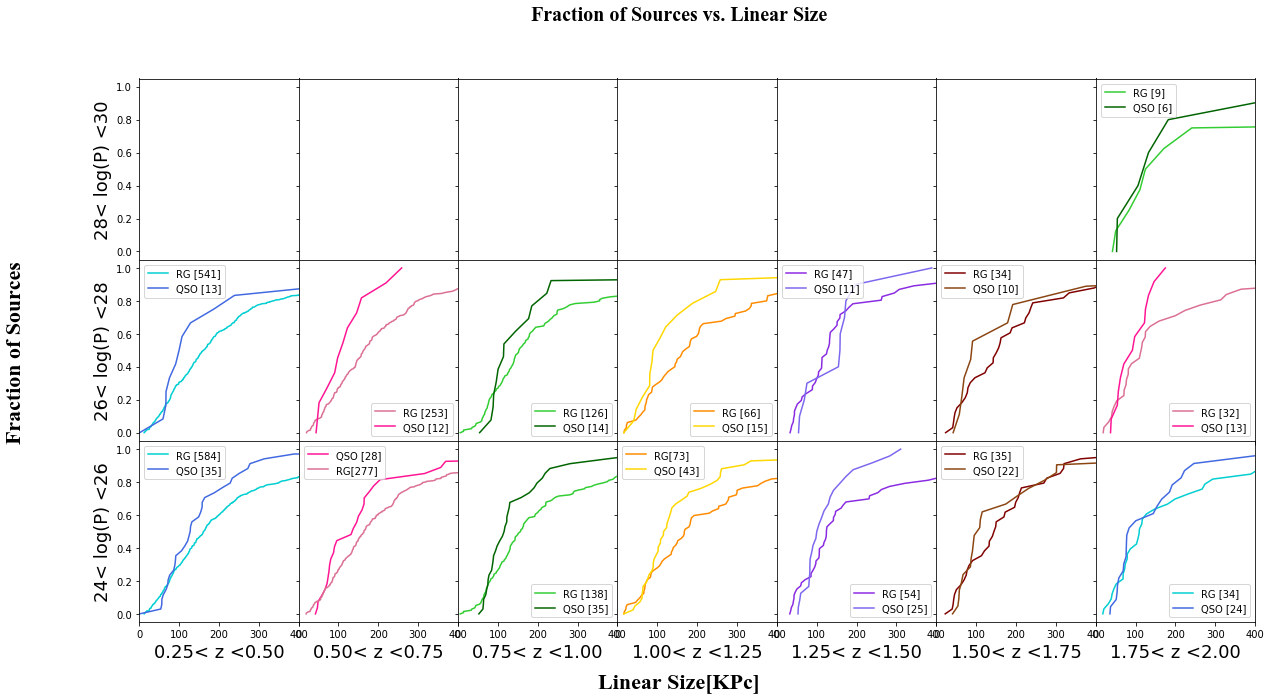

In [305]:
csfont = {'fontname':'Times New Roman'}

fig, axes  = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True,figsize = (20,10))
axes[2,0].plot(Square(bin1_rg,Z_rg1,0.25,0.50),np.linspace(0,1.0,num=584), c = 'darkturquoise', label = 'RG [584]')
axes[2,0].plot(Square(bin1_qso,Z_qso1,0.25,0.50),np.linspace(0,1.0,num=35), c='royalblue',label='QSO [35]')
axes[2,0].legend()
axes[2,0].set_xlabel('0.25< z <0.50',fontsize=18)
axes[2,0].set_ylabel('24< log(P) <26',fontsize=18)

axes[2,1].plot(Square(bin1_qso,Z_qso1,0.50,0.75),np.linspace(0,1.0,num=28), c='deeppink',label='QSO [28]')
axes[2,1].plot(Square(bin1_rg,Z_rg1,0.50,0.75),np.linspace(0,1.0,num=277), c = 'palevioletred', label = 'RG[277]')
axes[2,1].legend()
axes[2,1].set_xlabel('0.50< z <0.75',fontsize=18)

axes[2,2].plot(Square(bin1_rg,Z_rg1,0.75,1.00),np.linspace(0,1.0,num=138), c = 'limegreen', label = 'RG [138]')
axes[2,2].plot(Square(bin1_qso,Z_qso1,0.75,1.00),np.linspace(0,1.0,num=35), c='darkgreen',label='QSO [35]')
axes[2,2].legend()
axes[2,2].set_xlabel('0.75< z <1.00',fontsize=18)

axes[2,3].plot(Square(bin1_rg,Z_rg1,1.00,1.25),np.linspace(0,1.0,num=73), c = 'darkorange', label = 'RG[73]')
axes[2,3].plot(Square(bin1_qso,Z_qso1,1.00,1.25),np.linspace(0,1.0,num=43), c='gold',label='QSO [43]')
axes[2,3].legend()
axes[2,3].set_xlabel('1.00< z <1.25',fontsize=18)

axes[2,4].plot(Square(bin1_rg,Z_rg1,1.25,1.50),np.linspace(0,1.0,num=54), c = 'blueviolet', label = 'RG [54]')
axes[2,4].plot(Square(bin1_qso,Z_qso1,1.25,1.50),np.linspace(0,1.0,num=25), c='mediumslateblue',label='QSO [25]')
axes[2,4].legend()
axes[2,4].set_xlabel('1.25< z <1.50',fontsize=18)

axes[2,5].plot(Square(bin1_rg,Z_rg1,1.50,1.75),np.linspace(0,1.0,num=35), c = 'maroon', label = 'RG [35]')
axes[2,5].plot(Square(bin1_qso,Z_qso1,1.50,1.75),np.linspace(0,1.0,num=22), c='saddlebrown',label='QSO [22]')
axes[2,5].legend()
axes[2,5].set_xlabel('1.50< z <1.75',fontsize=18)

axes[2,6].plot(Square(bin1_rg,Z_rg1,1.75,2.00),np.linspace(0,1.0,num=34), c = 'darkturquoise', label = 'RG [34]')
axes[2,6].plot(Square(bin1_qso,Z_qso1,1.75,2.00),np.linspace(0,1.0,num=24), c='royalblue',label='QSO [24]')
axes[2,6].legend()
axes[2,6].set_xlabel('1.75< z <2.00',fontsize=18)

axes[1,0].plot(Square(bin2_rg,Z_rg2,0.25,0.50),np.linspace(0,1.0,num=541), c = 'darkturquoise', label = 'RG [541]')
axes[1,0].plot(Square(bin2_qso,Z_qso2,0.25,0.50),np.linspace(0,1.0,num=13), c='royalblue',label='QSO [13]')
axes[1,0].legend()
axes[1,0].set_ylabel('26< log(P) <28',fontsize=18)


axes[1,1].plot(Square(bin2_rg,Z_rg2,0.50,0.75),np.linspace(0,1.0,num=253), c = 'palevioletred', label = 'RG [253]')
axes[1,1].plot(Square(bin2_qso,Z_qso2,0.50,0.75),np.linspace(0,1.0,num=12), c='deeppink',label='QSO [12]')
axes[1,1].legend()

axes[1,2].plot(Square(bin2_rg,Z_rg2,0.75,1.00),np.linspace(0,1.0,num=126), c = 'limegreen', label = 'RG [126]')
axes[1,2].plot(Square(bin2_qso,Z_qso2,0.75,1.00),np.linspace(0,1.0,num=14), c='darkgreen',label='QSO [14]')
axes[1,2].legend()

axes[1,3].plot(Square(bin2_rg,Z_rg2,1.00,1.25),np.linspace(0,1.0,num=66), c = 'darkorange', label = 'RG [66]')
axes[1,3].plot(Square(bin2_qso,Z_qso2,1.00,1.25),np.linspace(0,1.0,num=15), c='gold',label='QSO [15]')
axes[1,3].legend()

axes[1,4].plot(Square(bin2_rg,Z_rg2,1.25,1.50),np.linspace(0,1.0,num=47), c = 'blueviolet', label = 'RG [47]')
axes[1,4].plot(Square(bin2_qso,Z_qso2,1.25,1.50),np.linspace(0,1.0,num=11), c='mediumslateblue',label='QSO [11]')
axes[1,4].legend(loc=2)

axes[1,5].plot(Square(bin2_rg,Z_rg2,1.50,1.75),np.linspace(0,1.0,num=34), c = 'maroon', label = 'RG [34]')
axes[1,5].plot(Square(bin2_qso,Z_qso2,1.50,1.75),np.linspace(0,1.0,num=10), c='saddlebrown',label='QSO [10]')
axes[1,5].legend()

axes[1,6].plot(Square(bin2_rg,Z_rg2,1.75,2.00),np.linspace(0,1.0,num=32), c = 'palevioletred', label = 'RG [32]')
axes[1,6].plot(Square(bin2_qso,Z_qso2,1.75,2.00),np.linspace(0,1.0,num=13), c='deeppink',label='QSO [13]')
axes[1,6].legend()

axes[0,6].plot(Square(bin3_rg,Z_rg3,1.75,2.00),np.linspace(0,1.0,num=9), c = 'limegreen', label = 'RG [9]')
axes[0,6].plot(Square(bin3_qso,Z_qso3,1.75,2.00),np.linspace(0,1.0,num=6), c='darkgreen',label='QSO [6]')
axes[0,6].set_xlim(0,400)
axes[0,6].legend()

axes[0,0].set_ylabel('28< log(P) <30',fontsize=18)


plt.subplots_adjust(wspace=0,hspace=0)
fig.text(0.5, 0.04, 'Linear Size[KPc]', va='center', ha='center',fontsize=22,**csfont)
fig.text(0.04, 0.5, 'Fraction of Sources', va='center', ha='center', rotation='vertical',fontsize=22,**csfont)
plt.suptitle('Fraction of Sources vs. Linear Size', fontsize=20,**csfont)
plt.savefig('alltogether.png')
plt.show()


# Finding errors and plotting median vs. redshift & Power

In [23]:
from astropy.stats import median_absolute_deviation

In [24]:
ranges1  = np.linspace(5e25, 1e28, num=21)
rangesz = np.linspace(0.25, 2.00, num=7)

In [25]:
P24_26 = array([2.299032692454812,2.9595322142956837,2.822576211613008,2.7531500312753763,3.4435544420169513,2.7006959087860984,2.405500084280049]) ##Linear Size ratio based on power
P26_28 = array([1.5084271755973002,3.326856251170076,3.29053241300456,2.049278434665538,3.6660200475989457,3.1005859425569073,2.3361409130814152])
P28_30 = array([2.587299213909969,5.194048188775083,3.0931154778665952,3.8345326268171935,1.5367708341779882,4.2302856664015245,2.1899026373939017])
Ratio = np.concatenate([P24_26,P26_28])

In [26]:
e_bin2 = array([0.8217870751301455,0.6684865601474816,0.69359184904357203,0.637645970956124,0.23854910235395194,0.27279194140417590,0.20772521139221312])
e_bin1 = array([0.6141338477597234,0.78333691826900035,0.1099267989891175,0.3583580447254293,0.2626501019992499,0.30470389129737196,0.3080147983995911])
e_bin3 = array([0.2738285822896093,0.11295990884564583,0.0,0.22855112645496847,0.3205312034025096,0.09327105420995006,0.20443823385281237])


e_P_bin1 = array([0.0523877382278442,0.05834999680519104,0.07079994678497314,0.061282992362976074,0.0746999979019165,0.04745000600814819,0.05479997396469116])
e_P_bin2 = array([0.07676687836647034,0.04929998517036438,0.06816157698631287,0.05299997329711914,0.04670000076293945,0.03450000286102295,0.03641593456268310])
e_P_bin3 = array([0.043108411133479585,0.0505642768002927,0.037449397693023556,0.02505806274753475,0.0285391943460251,0.03279951292412733,0.036651184377073953])
redshift = array([0.36495,0.61885,0.8606499942779541,1.1115499999999998,1.4065,1.634499967098236,1.8884,0.3639,0.6163000000000001,0.8627499942779542,1.1200000047683716,1.4067,1.600000023841858,1.8888,0.35760000000000003,0.62665,0.8561,1.1089999675750732,1.3939999711990356,1.593100029563904,1.9647],dtype=float)

e_bin_tot = np.concatenate((e_bin1,e_bin2,e_bin3),axis=0)
e_P_tot= np.concatenate((e_P_bin1,e_P_bin2,e_P_bin3),axis=0)


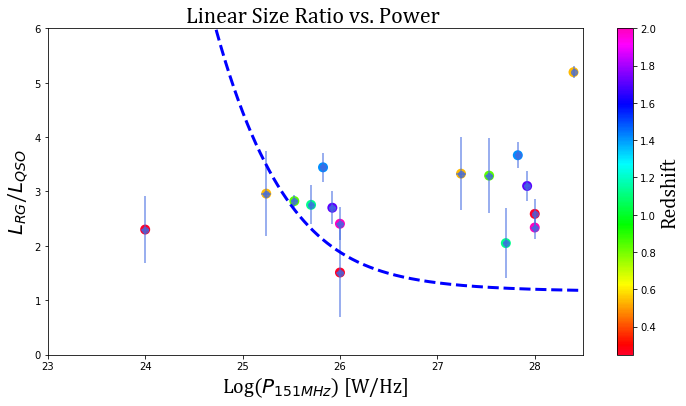

In [112]:
bsfont = {'fontname':'Cambria Math'}



f = plt.figure(figsize=(12,6))
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('Log($P_{151MHz}$) [W/Hz]', fontsize=20,**bsfont)

plt.title('Linear Size Ratio vs. Power ',fontsize=22,**bsfont)
plt.errorbar(np.log10(np.linspace(1e28, 1e29, num=7)),P28_30,yerr=e_bin3,c = 'royalblue',fmt='o',alpha=0.7)
plt.errorbar(np.log10(np.linspace(1e26, 1e28, num=7)),P26_28,yerr=e_bin2,xerr=e_P_bin3,c = 'royalblue',fmt='o',alpha=0.7)
plt.errorbar(np.log10(np.linspace(1e24, 1e26, num=7)),P24_26,yerr=e_bin1,xerr=e_P_bin3,c = 'royalblue',fmt='o',alpha=0.7)

val = plt.scatter(np.log10(np.linspace(1e24, 1e26, num=7)),P24_26,c=rangesz,s=100,cmap='gist_rainbow',lw=0)
plt.scatter(np.log10(np.linspace(1e26, 1e28, num=7)),P26_28,c=rangesz,s=100,cmap='gist_rainbow',lw=0)
plt.scatter(np.log10(np.linspace(1e28, 1e29, num=7)),P28_30,c=rangesz,s=100,cmap='gist_rainbow',lw=0)
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('Redshift',fontsize=20,**bsfont)
plt.plot(np.log10(L_low_f),receding_ratio,lw=3,linestyle="--",c='blue')
plt.xlim(23,28.5)
plt.ylim(0,6)
plt.savefig('L vs. P.png')
plt.show()

In [27]:
new_f24 = array([ 2.82257621, 2.75315003, 3.44355444,2.70069591, 2.40550008])
new_f26 = array([3.29053241, 2.04927843, 3.66602005,3.10058594, 2.33614091])
new_f28 = array([3.09311548, 3.83453263, 1.53677083,4.23028567, 2.18990264])
newz = array([0.83333333, 1.125, 1.41666667,1.70833333, 2.])


In [28]:
nw_P24 = array([3.40e+25, 5.05e+25, 6.70e+25, 8.55e+25,1.00e+26])
nw_P26 = array([3.40e+27, 5.05e+27, 6.70e+27, 8.35e+27,1.00e+28])
nw_P28 = array([4.0e+28, 5.5e+28, 7.0e+28, 8.5e+28, 1.0e+29])

In [29]:
E_bin2 = array([0.69359184904357203,0.637645970956124,0.63854910235395194,0.67279194140417590,0.50772521139221312])
E_bin1 = array([0.4099267989891175,0.5583580447254293,0.5626501019992499,0.30470389129737196,0.3080147983995911])
E_bin3 = array([0.03,0.22855112645496847,0.3205312034025096,0.09327105420995006,0.20443823385281237])


E_P_bin1 = array([0.07079994678497314,0.061282992362976074,0.0746999979019165,0.04745000600814819,0.05479997396469116])
E_P_bin2 = array([0.06816157698631287,0.05299997329711914,0.04670000076293945,0.03450000286102295,0.03641593456268310])
E_P_bin3 = array([0.037449397693023556,0.02505806274753475,0.0285391943460251,0.03279951292412733,0.036651184377073953])

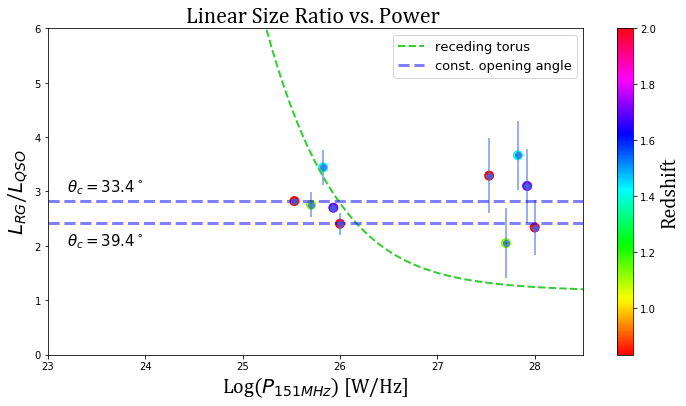

In [40]:
##### For excluded points


bsfont = {'fontname':'Cambria Math'}



f = plt.figure(figsize=(12,6))
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('Log($P_{151MHz}$) [W/Hz]', fontsize=20,**bsfont)

plt.title('Linear Size Ratio vs. Power ',fontsize=22,**bsfont)

plt.errorbar(np.log10(nw_P24),new_f24,yerr=E_bin3,c = 'royalblue',fmt='o',alpha=0.7)
plt.errorbar(np.log10(nw_P26),new_f26,yerr=E_bin2,xerr=E_P_bin3,c = 'royalblue',fmt='o',alpha=0.7)
plt.errorbar(np.log10(nw_P28),new_f28,yerr=E_bin1,xerr=E_P_bin3,c = 'royalblue',fmt='o',alpha=0.7)

val = plt.scatter(np.log10(nw_P24),new_f24,c=newz,s=100,cmap='hsv',lw=0)
plt.scatter(np.log10(nw_P26),new_f26,c=newz,s=100,cmap='hsv',lw=0)
plt.scatter(np.log10(nw_P28),new_f28,c=newz,s=100,cmap='hsv',lw=0)
cbar = plt.colorbar(val)
cbar.ax.set_ylabel('Redshift',fontsize=20,**bsfont)
plt.plot(np.log10(L_low_f),receding_ratio,lw=2,linestyle="--",c='limegreen',label='receding torus')
plt.axhline(y=2.8158,lw=3,linestyle="--",c='blue',alpha=0.5,label='const. opening angle')
plt.axhline(y=2.411,lw=3,linestyle="--",c='blue',alpha=0.5)
plt.text(23.2,3, r'$\theta_c=33.4^\circ$',fontsize = 15,**bsfont)
plt.text(23.2,2, r'$\theta_c=39.4^\circ$',fontsize = 15,**bsfont)
#plt.scatter(np.log10(1.3e27),2.59)
plt.xlim(23,28.5)
plt.ylim(0,6)
plt.legend(loc=1, prop={'size': 13})
#plt.savefig('New L vs. P.png')
plt.show()

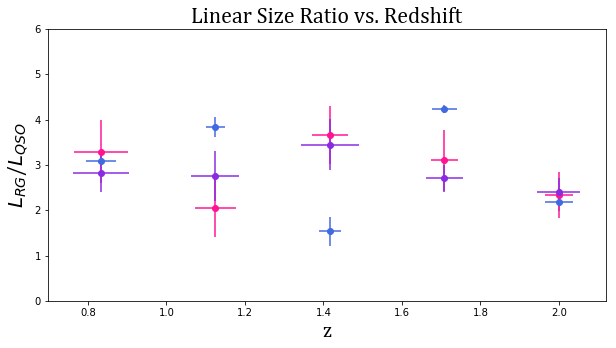

In [43]:
##### For excluded points

f = plt.figure(figsize=(10,5))

plt.errorbar(newz,new_f28,xerr=E_P_bin3,yerr=E_bin3,c = 'royalblue',fmt='o',label = '28<P<30')
plt.errorbar(newz,new_f26,xerr=E_P_bin2,yerr=E_bin2,c = 'deeppink',fmt='o',label = '26<P<28')
plt.errorbar(newz,new_f24, xerr=E_P_bin1,yerr=E_bin1, fmt='o',c='blueviolet',label = '24<P<26')
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('z', fontsize=20,**bsfont)
plt.title('Linear Size Ratio vs. Redshift',fontsize=22,**bsfont)
#plt.legend(loc=2, prop={'size': 15},markerscale=1)
plt.ylim(0,6)
plt.savefig('L vs. z.png')
plt.show()

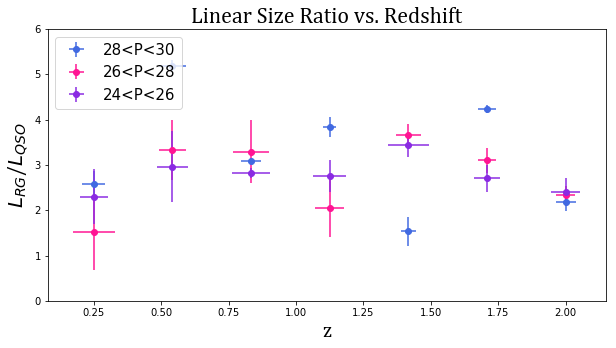

In [42]:


f = plt.figure(figsize=(10,5))

plt.errorbar(rangesz,P28_30,xerr=e_P_bin3,yerr=e_bin3,c = 'royalblue',fmt='o',label = '28<P<30')
plt.errorbar(rangesz,P26_28,xerr=e_P_bin2,yerr=e_bin2,c = 'deeppink',fmt='o',label = '26<P<28')
plt.errorbar(rangesz,P24_26, xerr=e_P_bin1,yerr=e_bin1, fmt='o',c='blueviolet',label = '24<P<26')
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('z', fontsize=20,**bsfont)
plt.title('Linear Size Ratio vs. Redshift',fontsize=22,**bsfont)
plt.legend(loc=2, prop={'size': 15},markerscale=1)
plt.ylim(0,6)
#plt.savefig('L vs. z.png')
plt.show()

# Model

In [424]:
def Schrodinger(x,z,mn,mx,L,Mn,Mx,n): ###Function that 
    cat = x[(z >= mn) & (z <= mx) & (L >= Mn) & (L <= Mx)]
    return array(cat[:,n])


In [53]:
##  using table 2 the normalisations are:
#L_0 = 1.58e28
#theta_0 = 1.255603 ( 71.94 deg )
#theta_0 = 1.0856  ( 62.2 deg )
#theta_0 = 0.8876 ( 50.86 deg )

#rad_powers <- 10.^seq(25,30,0.5)
#q_frac <- 1 - 1/( sqrt( 1 + rad_powers/1.5e28*tan( 1.255603)^2. ) )
#q_frac <- 1 - 1/( sqrt( 1 + rad_powers/1.5e28*tan( 1.0856 )^2. ) )  ## from mean size ratio, all
#q_frac <- 1 - 1/( sqrt( 1 + rad_powers/1.5e28*tan( 0.8876 )^2. ) )  ## from mean size ratio, no MRC
#q_frac <- 1 - 1/( sqrt( 1 + rad_powers/1.5e28*tan( 0.8093073 )^2. ) ) ## mean qso_fraction, 46.37 deg  (all z qso frac)
#q_frac <- 1 - 1/( sqrt( 1 + rad_powers/1.5e28*tan( 0.6266442 )^2. ) ) ## mean qso_fraction, 35.9 deg (low-z qso frac only)
#theta_pred <- acos( 1 - q_frac )
#fs_rg <- acos( cos( theta_pred ) / 2 )
#fs_qso <- acos( (1+cos(theta_pred))/2 )
#receding_ratio <- sin( fs_rg ) / sin( fs_qso )

In [34]:
L_0 = 1.58e26

def q_frac(L,theta):
    fraction = 1-((1+(L/L_0)*(np.tan(theta)**2)))**(-0.5)
    return fraction

In [38]:
frac = q_frac(L_low_f,np.radians(32.2))
theta_pred = np.arccos(1-frac)
fs_rg = np.arccos(np.cos(theta_pred)/2)
fs_qso = np.arccos((1+np.cos(theta_pred))/2)
receding_ratio = np.sin(fs_rg)/np.sin(fs_qso)
L_low_f.sort()

In [47]:
receding_ratio.tolist()

[49.768635887078965,
 47.49085490635209,
 46.1943904904527,
 46.151391001072156,
 45.090308389583804,
 44.256592589240725,
 42.39714558472634,
 41.278830263513555,
 40.8309236348545,
 40.53871921788383,
 39.48056668931474,
 38.93646377029033,
 38.91708710636778,
 38.66107225326633,
 38.645526800976775,
 38.53124414530062,
 38.12370646387117,
 37.89955549125313,
 37.36450378854941,
 37.35375840366262,
 37.19808467179607,
 37.15024264398833,
 37.010829589552365,
 36.9902131280695,
 36.80905613600267,
 36.33214859608616,
 36.27418682403541,
 36.255326238450095,
 36.16556406273185,
 35.98431113289604,
 35.51940326103687,
 34.87694965232173,
 34.70562495183454,
 34.668711271179475,
 34.50735689453405,
 34.45902136937482,
 34.43811536571625,
 34.40735931288764,
 34.15127322243168,
 33.86035714057171,
 33.85738521825572,
 33.25597723546724,
 33.01565205369569,
 32.51237777117968,
 32.095849294102784,
 32.01495565116589,
 31.90461127856032,
 31.765224709116374,
 31.43683498627937,
 31.36061629

(0, 5)

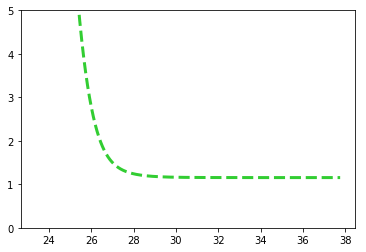

In [39]:
plt.plot(np.log10(L_low_f),receding_ratio,lw=3,linestyle="--",c='limegreen')
plt.ylim(0,5)
#plt.xlim(24,30)

In [426]:
# Create range of Theta C and calculate new ratio

θ_c = np.linspace(0, 90, num=90) ### radians

#Define function to evaluate R

def Num(theta):
    num  = np.sin(np.arccos(np.cos((np.deg2rad(theta)))/2))
    return num

def Denom(theta):
    denom1 = np.sin(np.arccos((1+np.cos(np.deg2rad(theta)))/2))
    return denom1


In [427]:
R_θ =Num(θ_c)/Denom(θ_c)

R_θ_c = np.nan_to_num(R_θ)   

In [516]:
R_θ_c

array([1.79769313e+308, 6.93988693e+001, 3.47082138e+001, 2.31485595e+001,
       1.73716507e+001, 1.39078347e+001, 1.16005595e+001, 9.95415872e+000,
       8.72079830e+000, 7.76279187e+000, 6.99752687e+000, 6.37243106e+000,
       5.85245570e+000, 5.41333577e+000, 5.03773866e+000, 4.71295336e+000,
       4.42944625e+000, 4.17992657e+000, 3.95872340e+000, 3.76135945e+000,
       3.58425261e+000, 3.42450284e+000, 3.27973719e+000, 3.14799520e+000,
       3.02764296e+000, 2.91730787e+000, 2.81582833e+000, 2.72221471e+000,
       2.63561866e+000, 2.55530873e+000, 2.48065090e+000, 2.41109291e+000,
       2.34615144e+000, 2.28540171e+000, 2.22846885e+000, 2.17502079e+000,
       2.12476234e+000, 2.07743017e+000, 2.03278866e+000, 1.99062632e+000,
       1.95075281e+000, 1.91299635e+000, 1.87720149e+000, 1.84322728e+000,
       1.81094555e+000, 1.78023953e+000, 1.75100263e+000, 1.72313732e+000,
       1.69655423e+000, 1.67117128e+000, 1.64691297e+000, 1.62370975e+000,
       1.60149744e+000, 1

In [528]:
θ_c####33.37078652

array([ 0.        ,  1.01123596,  2.02247191,  3.03370787,  4.04494382,
        5.05617978,  6.06741573,  7.07865169,  8.08988764,  9.1011236 ,
       10.11235955, 11.12359551, 12.13483146, 13.14606742, 14.15730337,
       15.16853933, 16.17977528, 17.19101124, 18.20224719, 19.21348315,
       20.2247191 , 21.23595506, 22.24719101, 23.25842697, 24.26966292,
       25.28089888, 26.29213483, 27.30337079, 28.31460674, 29.3258427 ,
       30.33707865, 31.34831461, 32.35955056, 33.37078652, 34.38202247,
       35.39325843, 36.40449438, 37.41573034, 38.42696629, 39.43820225,
       40.4494382 , 41.46067416, 42.47191011, 43.48314607, 44.49438202,
       45.50561798, 46.51685393, 47.52808989, 48.53932584, 49.5505618 ,
       50.56179775, 51.57303371, 52.58426966, 53.59550562, 54.60674157,
       55.61797753, 56.62921348, 57.64044944, 58.65168539, 59.66292135,
       60.6741573 , 61.68539326, 62.69662921, 63.70786517, 64.71910112,
       65.73033708, 66.74157303, 67.75280899, 68.76404494, 69.77

# Corrected CDF

In [567]:
a = Square(Bin1_rg,Z_rg1,0.25,0.50)
a.sort()
a1 = Square(Bin1_qso,Z_qso1,0.25,0.50)
a1.sort()

b1 = Square(Bin1_qso,Z_qso1,0.50,0.75)
b1.sort()
b = Square(Bin1_rg,Z_rg1,0.50,0.75)
b.sort()

c1 = Square(Bin1_qso,Z_qso1,0.75,1.00)
c1.sort()
c = Square(Bin1_rg,Z_rg1,0.75,1.00)
c.sort()

d1 = Square(Bin1_qso,Z_qso1,1.00,1.25)
d1.sort()
d = Square(Bin1_rg,Z_rg1,1.00,1.25)
d.sort()

e1 = Square(Bin1_qso,Z_qso1,1.25,1.50)
e1.sort()
e = Square(Bin1_rg,Z_rg1,1.25,1.50)
e.sort()

f1 = Square(Bin1_qso,Z_qso1,1.50,1.75)
f1.sort()
f = Square(Bin1_rg,Z_rg1,1.50,1.75)
f.sort()

g1 = Square(Bin1_qso,Z_qso1,1.75,2.00)
g1.sort()
g = Square(Bin1_rg,Z_rg1,1.75,2.00)
g.sort()


A = Square(Bin2_rg,Z_rg2,0.25,0.50)
A.sort()
A1 = Square(Bin2_qso,Z_qso2,0.25,0.50)
A1.sort()

B1 = Square(Bin2_qso,Z_qso2,0.50,0.75)
B1.sort()
B = Square(Bin2_rg,Z_rg2,0.50,0.75)
B.sort()

C1 = Square(Bin2_qso,Z_qso2,0.75,1.00)
C1.sort()
C = Square(Bin2_rg,Z_rg2,0.75,1.00)
C.sort()

D1 = Square(Bin2_qso,Z_qso2,1.00,1.25)
D1.sort()
D = Square(Bin2_rg,Z_rg2,1.00,1.25)
D.sort()

E1 = Square(Bin2_qso,Z_qso2,1.25,1.50)
E1.sort()
E = Square(Bin2_rg,Z_rg2,1.25,1.50)
E.sort()

F1 = Square(Bin2_qso,Z_qso2,1.50,1.75)
F1.sort()
F = Square(Bin2_rg,Z_rg2,1.50,1.75)
F.sort()

G1 = Square(Bin2_qso,Z_qso2,1.75,2.00)
G1.sort()
G = Square(Bin2_rg,Z_rg2,1.75,2.00)
G.sort()

h1 = Square(Bin3_qso,Z_qso3,1.75,2.00)
h1.sort()
h = Square(Bin3_rg,Z_rg3,1.75,2.00)
h.sort()


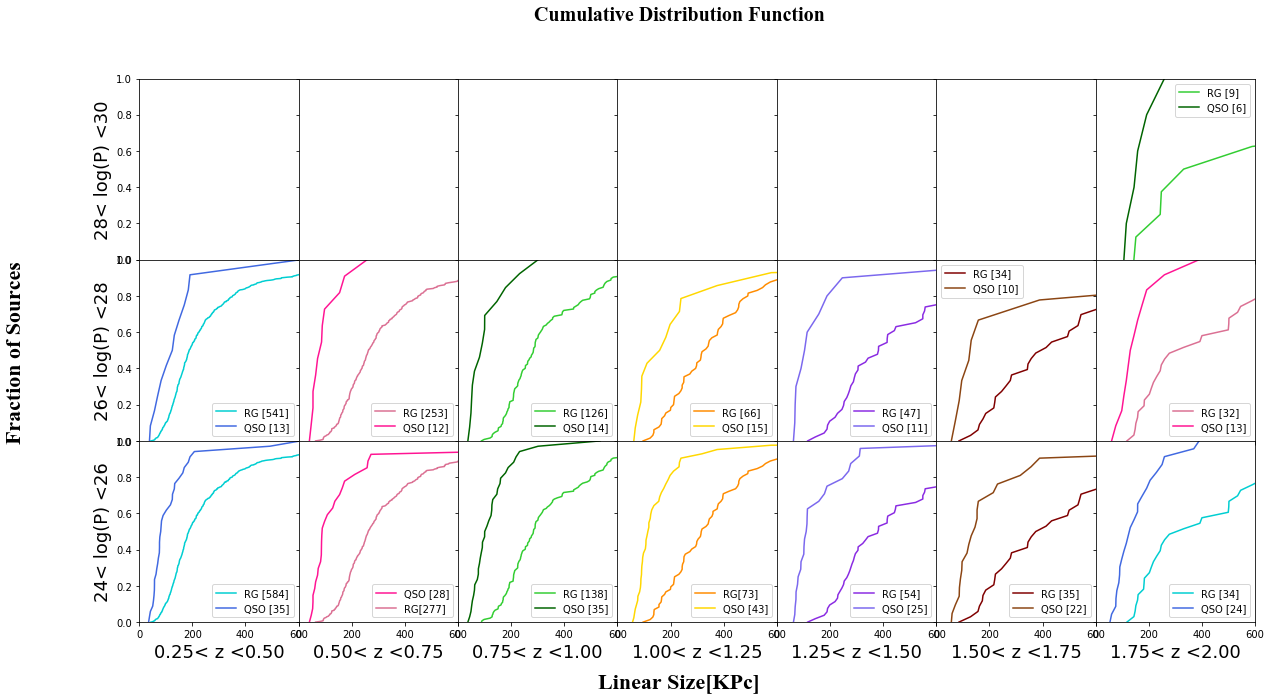

In [569]:
csfont = {'fontname':'Times New Roman'}

fig, axes  = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True,figsize = (20,10))
axes[2,0].plot(a,np.linspace(0,1.0,num=584), c = 'darkturquoise', label = 'RG [584]')
axes[2,0].plot(a1,np.linspace(0,1.0,num=35), c='royalblue',label='QSO [35]')
axes[2,0].legend()
axes[2,0].set_xlabel('0.25< z <0.50',fontsize=18)
axes[2,0].set_ylabel('24< log(P) <26',fontsize=18)

axes[2,1].plot(b1,np.linspace(0,1.0,num=28), c='deeppink',label='QSO [28]')
axes[2,1].plot(b,np.linspace(0,1.0,num=277), c = 'palevioletred', label = 'RG[277]')
axes[2,1].legend()
axes[2,1].set_xlabel('0.50< z <0.75',fontsize=18)

axes[2,2].plot(c,np.linspace(0,1.0,num=138), c = 'limegreen', label = 'RG [138]')
axes[2,2].plot(c1,np.linspace(0,1.0,num=35), c='darkgreen',label='QSO [35]')
axes[2,2].legend()
axes[2,2].set_xlabel('0.75< z <1.00',fontsize=18)

axes[2,3].plot(d,np.linspace(0,1.0,num=73), c = 'darkorange', label = 'RG[73]')
axes[2,3].plot(d1,np.linspace(0,1.0,num=43), c='gold',label='QSO [43]')
axes[2,3].legend()
axes[2,3].set_xlabel('1.00< z <1.25',fontsize=18)

axes[2,4].plot(e,np.linspace(0,1.0,num=54), c = 'blueviolet', label = 'RG [54]')
axes[2,4].plot(e1,np.linspace(0,1.0,num=25), c='mediumslateblue',label='QSO [25]')
axes[2,4].legend()
axes[2,4].set_xlabel('1.25< z <1.50',fontsize=18)

axes[2,5].plot(f,np.linspace(0,1.0,num=35), c = 'maroon', label = 'RG [35]')
axes[2,5].plot(f1,np.linspace(0,1.0,num=22), c='saddlebrown',label='QSO [22]')
axes[2,5].legend()
axes[2,5].set_xlabel('1.50< z <1.75',fontsize=18)

axes[2,6].plot(g,np.linspace(0,1.0,num=34), c = 'darkturquoise', label = 'RG [34]')
axes[2,6].plot(g1,np.linspace(0,1.0,num=24), c='royalblue',label='QSO [24]')
axes[2,6].legend()
axes[2,6].set_xlabel('1.75< z <2.00',fontsize=18)

axes[1,0].plot(A,np.linspace(0,1.0,num=541), c = 'darkturquoise', label = 'RG [541]')
axes[1,0].plot(A1,np.linspace(0,1.0,num=13), c='royalblue',label='QSO [13]')
axes[1,0].legend()
axes[1,0].set_ylabel('26< log(P) <28',fontsize=18)


axes[1,1].plot(B,np.linspace(0,1.0,num=253), c = 'palevioletred', label = 'RG [253]')
axes[1,1].plot(B1,np.linspace(0,1.0,num=12), c='deeppink',label='QSO [12]')
axes[1,1].legend()

axes[1,2].plot(C,np.linspace(0,1.0,num=126), c = 'limegreen', label = 'RG [126]')
axes[1,2].plot(C1,np.linspace(0,1.0,num=14), c='darkgreen',label='QSO [14]')
axes[1,2].legend()

axes[1,3].plot(D,np.linspace(0,1.0,num=66), c = 'darkorange', label = 'RG [66]')
axes[1,3].plot(D1,np.linspace(0,1.0,num=15), c='gold',label='QSO [15]')
axes[1,3].legend()

axes[1,4].plot(E,np.linspace(0,1.0,num=47), c = 'blueviolet', label = 'RG [47]')
axes[1,4].plot(E1,np.linspace(0,1.0,num=11), c='mediumslateblue',label='QSO [11]')
axes[1,4].legend(loc=4)

axes[1,5].plot(F,np.linspace(0,1.0,num=34), c = 'maroon', label = 'RG [34]')
axes[1,5].plot(F1,np.linspace(0,1.0,num=10), c='saddlebrown',label='QSO [10]')
axes[1,5].legend()

axes[1,6].plot(G,np.linspace(0,1.0,num=32),c = 'palevioletred', label = 'RG [32]')
axes[1,6].plot(G1,np.linspace(0,1.0,num=13), c='deeppink',label='QSO [13]')
axes[1,6].legend()

axes[0,6].plot(h,np.linspace(0,1.0,num=9), c = 'limegreen', label = 'RG [9]')
axes[0,6].plot(h1,np.linspace(0,1.0,num=6), c='darkgreen',label='QSO [6]')
axes[0,6].set_xlim(0,600)
axes[0,6].legend()

axes[0,0].set_ylabel('28< log(P) <30',fontsize=18)
plt.ylim(0,1)

plt.subplots_adjust(wspace=0,hspace=0)
fig.text(0.5, 0.04, 'Linear Size[KPc]', va='center', ha='center',fontsize=22,**csfont)
fig.text(0.04, 0.5, 'Fraction of Sources', va='center', ha='center', rotation='vertical',fontsize=22,**csfont)
plt.suptitle('Cumulative Distribution Function', fontsize=20,**csfont)
plt.savefig('new_alltogether.png')
plt.show()
